In [1]:
import sys
import seaborn as sns
sys.path.append('../src')

from generator import generate_samples
import statsmodels.formula.api as smf
import pandas as pd

,n,diff
0,5,0.000000e+00
1,6,-4.662937e-15
2,7,1.665335e-15
3,8,-3.552714e-15
4,9,5.329071e-15
...,...,...
990,995,-8.881784e-16
991,996,-1.221245e-15
992,997,-1.110223e-15
993,998,1.332268e-15


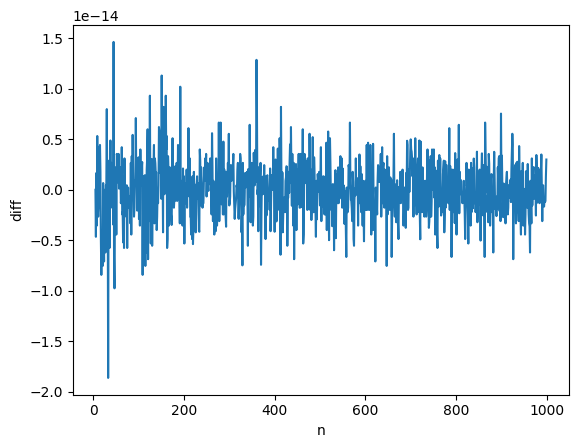

In [4]:
diff = []
for n in range(5, 1000):
    data = generate_samples(
        mu_metric=5,
        sigma_metric=1,
        epsilon=2,
        treatment_effect=2,
        size=10_000,
        cov_mu_eps=[(-1,1),(-2,1),(5,2)],
        non_linear=[True, True, True],
        p_binomial=0.05,
    )
    data = data.sample(n)
    result = smf.ols(f'Y ~ Y_before', data=data).fit()
    theta = data.cov().loc['Y_before', "Y"] / data.cov().loc['Y_before', "Y_before"]
    diff.append({'n': n, 'diff': result.params['Y_before'] - theta})

r = pd.DataFrame(diff)
sns.lineplot(data=r, x='n', y='diff');
r

In [14]:
data = data.sample(5)
result = smf.ols(f'Y ~ Y_before', data=data).fit()
theta = data.cov().loc['Y_before', "Y"] / data.cov().loc['Y_before', "Y_before"]
print(result.params['Y_before'] - theta)
data

-4.884981308350689e-15


,Y,T,Y_before,X_1,X_2,X_3,R_1
7379,49.076181,0,6.818473,-3.708431,-0.452289,5.413728,0.645104
780,44.909492,0,5.403251,-0.870231,-0.328794,6.245383,1.331797
6405,12.433243,0,5.087083,-1.176604,-0.999063,1.837254,-0.236907
1725,44.401950,0,4.204136,-3.281425,-1.366819,5.639663,-0.391766
941,61.084151,0,5.157799,-2.250863,0.422913,7.014642,0.528325


### Including one covariate more:

,n,diff
0,5,6.553706
1,6,4.227132
2,7,0.727229
3,8,2.343232
4,9,6.476087
...,...,...
990,995,-0.037467
991,996,-0.184872
992,997,0.090681
993,998,-0.106605


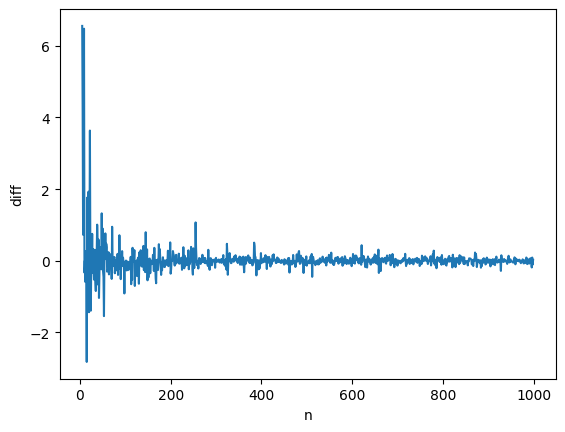

In [6]:
diff = []
for n in range(5, 1000):
    data = generate_samples(
        mu_metric=5,
        sigma_metric=1,
        epsilon=2,
        treatment_effect=2,
        size=10_000,
        cov_mu_eps=[(-1,1),(-2,1),(5,2)],
        non_linear=[True, True, True],
        p_binomial=0.05,
    )
    data = data.sample(n)
    result = smf.ols(f'Y ~ Y_before + X_1', data=data).fit()
    theta = data.cov().loc['Y_before', "Y"] / data.cov().loc['Y_before', "Y_before"]
    diff.append({'n': n, 'diff': result.params['Y_before'] - theta})

r = pd.DataFrame(diff)
sns.lineplot(data=r, x='n', y='diff');
r